This portion of the project is based in large part on this [tutorial](https://houxianxu.github.io/implementation/SVM.html)

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def unpickle(file): #adapted from https://www.cs.toronto.edu/~kriz/cifar.html
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  datadict = unpickle(filename)
  X = datadict[b'data']
  Y = datadict[b'labels']
  X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
  Y = np.array(Y)
  return X, Y

def load_CIFAR10(ROOT): #adapted from tutorial
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):
    f = ROOT + '/data_batch_%d'%(b,)
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(ROOT + '/test_batch')
  return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(cifar10_dir, num_training=49000, num_val=1000, num_test=10000, show_sample=True):
    """
    Load the CIFAR-10 dataset, and divide the sample into training set, validation set and test set
    """
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # subsample the data for validation set
    mask = range(num_training, num_training + num_val)
    X_val = X_train[mask]
    y_val = y_train[list(mask)]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    return X_train, y_train, X_val, y_val, X_test, y_test

def visualize_sample(X_train, y_train, classes, samples_per_class=7):
    """visualize some samples in the training datasets """
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    
def preprocessing_CIFAR10_data(X_train, y_train, X_val, y_val, X_test, y_test):
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1)) # [49000, 3072]
    X_val = np.reshape(X_val, (X_val.shape[0], -1)) # [1000, 3072]
    X_test = np.reshape(X_test, (X_test.shape[0], -1)) # [10000, 3072]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]).T
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]).T
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]).T
    return X_train, y_train, X_val, y_val, X_test, y_test


In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #our classes

In [ ]:
import torchvision.transforms as transforms
import torchvision

# Transformations applied to images as they are loaded by the Pytorch dataloader
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

#where we'll store the data
google_drive_path = './drive/MyDrive/Colab Notebooks/3337_Project'

#download our data
trainset = torchvision.datasets.CIFAR10(root=google_drive_path, train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=google_drive_path, train=False, download=True, transform=transform)




  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./drive/MyDrive/Colab Notebooks/3337_Project/cifar-10-python.tar.gz to ./drive/MyDrive/Colab Notebooks/3337_Project
Files already downloaded and verified


In [ ]:
!ls "/content/drive/MyDrive/" 

'Colab Notebooks'


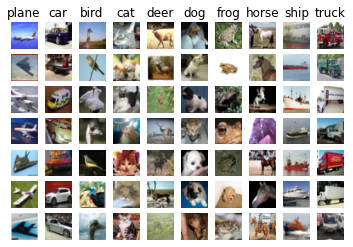

Train data shape:  (3073, 49000)
Train labels shape:  (49000,)
Validation data shape:  (3073, 1000)
Validation labels shape:  (1000,)
Test data shape:  (3073, 10000)
Test labels shape:  (10000,)


In [ ]:
# use functions defined above to get our data
cifar10_dir = './drive/MyDrive/Colab Notebooks/3337_Project/cifar-10-batches-py' #changed
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = get_CIFAR10_data(cifar10_dir)

visualize_sample(X_train_raw, y_train_raw, classes) #visualize

#now we preprocess (reshape, normalizes, adds bias dimension, and transforms into columns)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessing_CIFAR10_data(X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw)

# As a sanity check, we print out the size of the training and test data dimenstion
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
print(X_train_raw[0][0])

[[ 59.  62.  63.]
 [ 43.  46.  45.]
 [ 50.  48.  43.]
 [ 68.  54.  42.]
 [ 98.  73.  52.]
 [119.  91.  63.]
 [139. 107.  75.]
 [145. 110.  80.]
 [149. 117.  89.]
 [149. 120.  93.]
 [131. 103.  77.]
 [125.  99.  76.]
 [142. 115.  91.]
 [144. 112.  86.]
 [137. 105.  79.]
 [129.  97.  71.]
 [137. 106.  79.]
 [134. 106.  76.]
 [124.  97.  64.]
 [139. 113.  78.]
 [139. 112.  75.]
 [133. 105.  69.]
 [136. 105.  74.]
 [139. 108.  77.]
 [152. 120.  89.]
 [163. 131. 100.]
 [168. 136. 108.]
 [159. 129. 102.]
 [158. 130. 104.]
 [158. 132. 108.]
 [152. 125. 102.]
 [148. 124. 103.]]


In [ ]:
#the following function definition is from the tutorial's github page
# https://github.com/houxianxu/houxianxu.github.io/blob/master/implementation/algorithms/classifiers/loss_grad_svm.py
def loss_grad_svm_vectorized(W, X, y, reg):
    """
    Compute the loss and gradients using softmax function 
    with loop, which is slow.
    Parameters
    ----------
    W: (K, D) array of weights, K is the number of classes and D is the dimension of one sample.
    X: (D, N) array of training data, each column is a training sample with D-dimension.
    y: (N, ) 1-dimension array of target data with length N with lables 0,1, ... K-1, for K classes
    reg: (float) regularization strength for optimization.
    Returns
    -------
    a tuple of two items (loss, grad)
    loss: (float)
    grad: (K, D) with respect to W
    """

    dW = np.zeros(W.shape)
    loss = 0.0
    delta = 1.0

    num_train = y.shape[0]

    # compute all scores
    scores_mat = W.dot(X) # [C x N] matrix
 
    # get the correct class score 
    correct_class_score = scores_mat[y, range(num_train)] # [1 x N]
    
    margins_mat = scores_mat - correct_class_score + delta # [C x N]

    # set the negative score to be 0
    margins_mat = np.maximum(0, margins_mat)
    margins_mat[y, range(num_train)] = 0

    loss = np.sum(margins_mat) / num_train

    # add regularization to loss
    loss += 0.5 * reg * np.sum(W * W)

    # compute gradient
    scores_mat_grad = np.zeros(scores_mat.shape)

    # compute the number of margin > 0 for each sample
    num_pos = np.sum(margins_mat > 0, axis=0)
    scores_mat_grad[margins_mat > 0] = 1
    scores_mat_grad[y, range(num_train)] = -1 * num_pos

    # compute dW
    dW = scores_mat_grad.dot(X.T) / num_train + reg * W
    
    return loss, dW

In [ ]:
# Test the loss and gradient
import time

# generate a rand weights W 
W = np.random.randn(10, X_train.shape[0]) * 0.001

tic = time.time()
loss_vec, grad_vect = loss_grad_svm_vectorized(W, X_train, y_train, 0)
toc = time.time()
print('Vectorized loss: %f, and gradient: computed in %fs' % (loss_vec, toc - tic))

Vectorized loss: 25.288677, and gradient: computed in 1.057879s


In [ ]:
# file: algorithms/gradient_check.py
def grad_check_sparse(f, x, analytic_grad, num_checks):
  """
  sample a few random elements and only return numerical
  in this dimensions.
  """
  h = 1e-5

  print(x.shape)
  import random

  for i in range(num_checks):
    ix = tuple([random.randrange(m) for m in x.shape])
    print(ix)
    x[ix] += h # increment by h
    fxph = f(x) # evaluate f(x + h)
    x[ix] -= 2 * h # increment by h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] += h # reset

    grad_numerical = (fxph - fxmh) / (2 * h)
    grad_analytic = analytic_grad[ix]
    rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
    print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))

In [ ]:
# Check gradient using numerical gradient along several randomly chosen dimenstion
f = lambda w: loss_grad_svm_vectorized(w, X_train, y_train, 0)[0]
grad_numerical = grad_check_sparse(f, W, grad_vect, 10)

(10, 3073)
(5, 1038)
numerical: -3.084066 analytic: -3.083158, relative error: 1.472187e-04
(5, 280)
numerical: 18.075676 analytic: 18.075778, relative error: 2.839952e-06
(8, 1669)
numerical: -18.253283 analytic: -18.252402, relative error: 2.415074e-05
(2, 2649)
numerical: -3.290050 analytic: -3.290973, relative error: 1.403308e-04
(9, 1102)
numerical: -6.543350 analytic: -6.544515, relative error: 8.895845e-05
(6, 1912)
numerical: 22.899592 analytic: 22.899922, relative error: 7.219932e-06
(3, 1043)
numerical: 28.031944 analytic: 28.030860, relative error: 1.933954e-05
(3, 1101)
numerical: 6.648440 analytic: 6.650854, relative error: 1.814863e-04
(2, 2654)
numerical: -3.009372 analytic: -3.010281, relative error: 1.509899e-04
(1, 2943)
numerical: -2.196346 analytic: -2.196951, relative error: 1.376746e-04


We then pivoted to utilize this [youtube tutorial](https://www.youtube.com/watch?v=FB5EdxAGxQg&ab_channel=codebasics) which utilizes the [sklearn.svm.SVC module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC

model = SVC()
tic = time.time()
trained_model = model.fit()
print(len(X_train),len(y_train))

3073 49000
